In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)

In /Users/shinggg/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/shinggg/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/shinggg/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/shinggg/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/shinggg/anaconda3/lib/python3.6/site-packa

In [3]:
owid_df = pd.read_csv('../1_owid/owid-covid-data.csv')
owid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [8]:
import math
notification_df = pd.read_csv('../2_ecdc/notification.csv')
notification_df[notification_df['rate_14_day'].apply(lambda rate: not math.isnan(rate) and not rate == 0)].head()

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
8,Afghanistan,AFG,Asia,38928341,cases,1,2020-09,0.002569,1,"Epidemic intelligence, national weekly data"
9,Afghanistan,AFG,Asia,38928341,cases,3,2020-10,0.010275,4,"Epidemic intelligence, national weekly data"
10,Afghanistan,AFG,Asia,38928341,cases,12,2020-11,0.038532,16,"Epidemic intelligence, national weekly data"
11,Afghanistan,AFG,Asia,38928341,cases,18,2020-12,0.077065,34,"Epidemic intelligence, national weekly data"
12,Afghanistan,AFG,Asia,38928341,cases,80,2020-13,0.251745,114,"Epidemic intelligence, national weekly data"


In [9]:
testing_df = pd.read_csv('../2_ecdc/testing.csv')
testing_df.head()

,country,country_code,year_week,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
0,Austria,AT,2020-W15,1954,12339,8858775,139.285624,15.835967,Manual webscraping
1,Austria,AT,2020-W16,773,58488,8858775,660.226724,1.321639,Manual webscraping
2,Austria,AT,2020-W17,479,33443,8858775,377.512692,1.432288,Manual webscraping
3,Austria,AT,2020-W18,349,26598,8858775,300.244673,1.312129,Country website
4,Austria,AT,2020-W19,249,42153,8858775,475.833284,0.590705,Country website


In [10]:
daily_notification_eu_df = pd.read_csv('../2_ecdc/dailynotificationeu.csv')
daily_notification_eu_df[daily_notification_eu_df['rate_14_day_per_100k'].apply(lambda rate: not math.isnan(rate) and not rate == 0)].head()

,country,region_name,nuts_code,date,rate_14_day_per_100k,source
19,Austria,Außerfern,AT331,2020-03-16,3.060912,"TESSy COVID-19, subnational daily data"
20,Austria,Außerfern,AT331,2020-03-17,9.182736,"TESSy COVID-19, subnational daily data"
21,Austria,Außerfern,AT331,2020-03-18,9.182736,"TESSy COVID-19, subnational daily data"
22,Austria,Außerfern,AT331,2020-03-19,18.365473,"TESSy COVID-19, subnational daily data"
23,Austria,Außerfern,AT331,2020-03-20,18.365473,"TESSy COVID-19, subnational daily data"


In [11]:
weekly_notification_eu_df = pd.read_csv('../2_ecdc/weeklynotificationeu.csv')
weekly_notification_eu_df[weekly_notification_eu_df['rate_14_day_per_100k'].apply(lambda rate: not math.isnan(rate) and not rate == 0)].head()

,country,region_name,nuts_code,year_week,rate_14_day_per_100k,source
1,Austria,Burgenland,AT11,2020-W14,38.509643,"Epidemic intelligence, subnational weekly data"
2,Austria,Burgenland,AT11,2020-W15,37.146470,"Epidemic intelligence, subnational weekly data"
3,Austria,Burgenland,AT11,2020-W16,27.945050,"Epidemic intelligence, subnational weekly data"
4,Austria,Burgenland,AT11,2020-W17,13.972525,"Epidemic intelligence, subnational weekly data"
5,Austria,Burgenland,AT11,2020-W18,6.475073,"Epidemic intelligence, subnational weekly data"


In [13]:
admission_rates_df = pd.read_csv('../2_ecdc/admissionrates.csv')
admission_rates_df.head()

,country,indicator,date,year_week,value,source,url
0,Austria,Daily hospital occupancy,2020-04-01,2020-W14,856.0,Country_Website,https://covid19-dashboard.ages.at/dashboard_Ho...
1,Austria,Daily hospital occupancy,2020-04-02,2020-W14,823.0,Country_Website,https://covid19-dashboard.ages.at/dashboard_Ho...
2,Austria,Daily hospital occupancy,2020-04-03,2020-W14,829.0,Country_Website,https://covid19-dashboard.ages.at/dashboard_Ho...
3,Austria,Daily hospital occupancy,2020-04-04,2020-W14,826.0,Country_Website,https://covid19-dashboard.ages.at/dashboard_Ho...
4,Austria,Daily hospital occupancy,2020-04-05,2020-W14,712.0,Country_Website,https://covid19-dashboard.ages.at/dashboard_Ho...


In [14]:
country_response_measures_df = pd.read_csv('../2_ecdc/country_response_measures.csv')
country_response_measures_df.head()

,Country,Response_measure,date_start,date_end
0,Austria,AdaptationOfWorkplace,2020-03-10,NaN
1,Austria,BanOnAllEvents,2020-11-03,NaN
2,Austria,ClosDaycare,2020-03-16,2020-05-04
3,Austria,ClosDaycarePartial,2020-11-17,2020-12-07
4,Austria,ClosHigh,2020-03-16,2020-09-30


In [ ]:
country_response_measures_df['week_start']=country_response_measures_df['date_start'].apply(lambda x: '2020-W'+str(pd.to_datetime(x).isocalendar()[1]))
country_response_measures_df['week_end']=country_response_measures_df['date_end'].apply(lambda x: '2020-W'+str(pd.to_datetime(x).isocalendar()[1]) if isinstance(x,str) else np.nan)

In [15]:
age_range_notification_df = pd.read_csv('../2_ecdc/agerangenotificationeu.csv')
age_range_notification_df.head()

,country,country_code,year_week,age_group,new_cases,population,rate_14_day_per_100k,source
0,Austria,AT,2020-W09,<15yr,0,1278692,NaN,"TESSy COVID-19, national weekly data"
1,Austria,AT,2020-W10,<15yr,0,1278692,NaN,"TESSy COVID-19, national weekly data"
2,Austria,AT,2020-W11,<15yr,10,1278692,0.8,"TESSy COVID-19, national weekly data"
3,Austria,AT,2020-W12,<15yr,58,1278692,5.3,"TESSy COVID-19, national weekly data"
4,Austria,AT,2020-W13,<15yr,156,1278692,16.7,"TESSy COVID-19, national weekly data"


In [16]:
week_testing=age_range_notification_df['year_week'].apply(lambda x: x[6:])
age_measures=pd.DataFrame()
for ii in range(len(country_response_measures_df)):
    date=country_response_measures_df['date_start'][ii]
    coun=country_response_measures_df['Country'][ii]
    week=pd.to_datetime(date).isocalendar()[1]
    snp=age_range_notification_df[week_testing==str(week).zfill(2)]
    snp=snp[snp['country']==coun]
    if not snp.empty:
        tmp=pd.DataFrame(dict(zip(snp['age_group'].apply(lambda x:(x,'+0')),snp['rate_14_day_per_100k'])),index=[ii])
        tmp['Response_measure']=country_response_measures_df.iloc[ii]['Response_measure']
        tmp['country']=coun
        tmp['date_start']=date
        for aa in snp['age_group']:
            tmp[aa+'_population']=snp[snp['age_group']==aa]['population'].values[0]
        
    snp=age_range_notification_df[week_testing==str(week-5).zfill(2)]
    snp=snp[snp['country']==coun]
    if not snp.empty:
        for aa in snp['age_group']:
            tmp[(aa,'-5')]=snp[snp['age_group']==aa]['rate_14_day_per_100k'].values
    
    snp=age_range_notification_df[week_testing==str(week-4).zfill(2)]
    snp=snp[snp['country']==coun]
    if not snp.empty:
        for aa in snp['age_group']:
            tmp[(aa,'-4')]=snp[snp['age_group']==aa]['rate_14_day_per_100k'].values
       
    snp=age_range_notification_df[week_testing==str(week-3).zfill(2)]
    snp=snp[snp['country']==coun]
    if not snp.empty:
        for aa in snp['age_group']:
            tmp[(aa,'-3')]=snp[snp['age_group']==aa]['rate_14_day_per_100k'].values
            
    snp=age_range_notification_df[week_testing==str(week-2).zfill(2)]
    snp=snp[snp['country']==coun]
    if not snp.empty:
        for aa in snp['age_group']:
            tmp[(aa,'-2')]=snp[snp['age_group']==aa]['rate_14_day_per_100k'].values
            
    snp=age_range_notification_df[week_testing==str(week-1).zfill(2)]
    snp=snp[snp['country']==coun]
    if not snp.empty:
        for aa in snp['age_group']:
            tmp[(aa,'-1')]=snp[snp['age_group']==aa]['rate_14_day_per_100k'].values
            
    snp=age_range_notification_df[week_testing==str(week+1).zfill(2)]
    snp=snp[snp['country']==coun]
    if not snp.empty:
        for aa in snp['age_group']:
            tmp[(aa,'+1')]=snp[snp['age_group']==aa]['rate_14_day_per_100k'].values
            
    snp=age_range_notification_df[week_testing==str(week+2).zfill(2)]
    snp=snp[snp['country']==coun]
    if not snp.empty:
        for aa in snp['age_group']:
            tmp[(aa,'+2')]=snp[snp['age_group']==aa]['rate_14_day_per_100k'].values
            
    snp=age_range_notification_df[week_testing==str(week+3).zfill(2)]
    snp=snp[snp['country']==coun]
    if not snp.empty:
        for aa in snp['age_group']:
            tmp[(aa,'+3')]=snp[snp['age_group']==aa]['rate_14_day_per_100k'].values
            
    snp=age_range_notification_df[week_testing==str(week+4).zfill(2)]
    snp=snp[snp['country']==coun]
    if not snp.empty:
        for aa in snp['age_group']:
            tmp[(aa,'+4')]=snp[snp['age_group']==aa]['rate_14_day_per_100k'].values
            
    snp=age_range_notification_df[week_testing==str(week+5).zfill(2)]
    snp=snp[snp['country']==coun]
    if not snp.empty:
        for aa in snp['age_group']:
            tmp[(aa,'+5')]=snp[snp['age_group']==aa]['rate_14_day_per_100k'].values
            
    age_measures=age_measures.append(tmp.copy())
        

<AxesSubplot:>

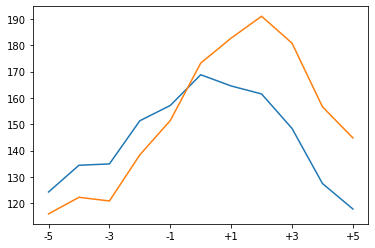

In [17]:
age_measures['15-24yr'].mean().loc[['-5','-4','-3','-2','-1','+0','+1','+2','+3','+4','+5']].plot()
age_measures['25-49yr'].mean().loc[['-5','-4','-3','-2','-1','+0','+1','+2','+3','+4','+5']].plot()

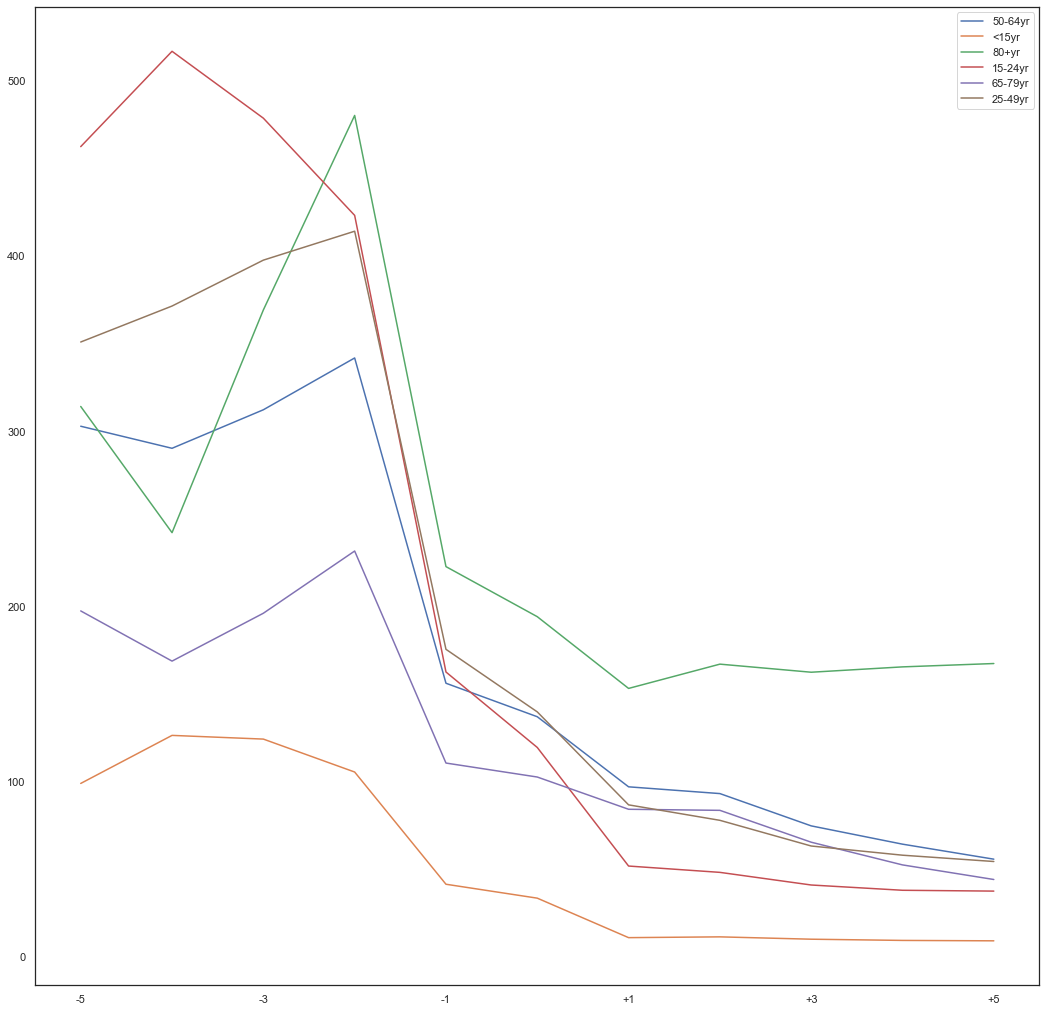

In [63]:
ban='ClosDaycare'
group_list = {}
plt.figure(figsize=(18,18))
for aa in set(age_range_notification_df['age_group']):
    group_list[aa] = age_measures.groupby('Response_measure').\
        apply(lambda x: x.mean(skipna=True))[aa].loc[ban]\
            .loc[['-5','-4','-3','-2','-1','+0','+1','+2','+3','+4','+5']]
    group_list[aa].plot(label=aa)
plt.legend()

In [59]:
set(age_range_notification_df['age_group'])

{'15-24yr', '25-49yr', '50-64yr', '65-79yr', '80+yr', '<15yr'}

In [73]:
group_list_df = pd.DataFrame(group_list)
group_list_df = group_list_df[['<15yr', '15-24yr', '25-49yr', '50-64yr', '65-79yr', '80+yr']]
group_list_df.index = group_list_df.index.astype(int)+1
group_list_df

,<15yr,15-24yr,25-49yr,50-64yr,65-79yr,80+yr
-4,99.025000,462.350000,350.875000,302.825000,197.450000,314.100000
-3,126.440000,516.740000,371.400000,290.240000,168.820000,242.100000
-2,124.328571,478.585714,397.585714,312.214286,196.128571,369.157143
-1,105.537500,423.125000,414.087500,341.775000,231.625000,480.150000
0,41.511765,162.600000,175.547059,156.194118,110.658824,222.735294
1,33.575000,119.550000,139.845000,137.080000,102.685000,194.165000
2,11.043478,51.895652,86.804348,97.091304,84.282609,153.234783
3,11.491667,48.287500,77.979167,93.237500,83.675000,167.087500
4,10.154167,41.079167,63.329167,74.812500,65.495833,162.475000
5,9.462500,38.070833,58.083333,64.379167,52.545833,165.525000


<AxesSubplot:>

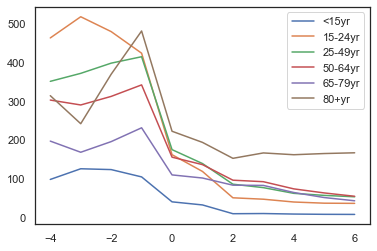

In [74]:
group_list_df.plot()


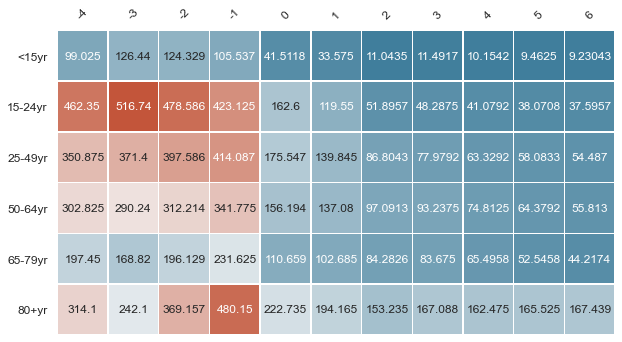

In [75]:
plt.figure(figsize=(10,6))
sns.set_theme(style='white')
cmap = sns.diverging_palette(230, 20, as_cmap=True)
hm = sns.heatmap(group_list_df.T, square=True, cmap=cmap, center=None,
                annot=True, fmt='g', xticklabels=True, yticklabels=True,
                cbar_kws={'shrink': 0.5}, cbar=False, linewidths=.5)
hm.set_xticklabels(hm.get_xticklabels(), rotation=45) 
hm.set_yticklabels(hm.get_yticklabels(), rotation=0)
hm.set(xlabel=None, ylabel=None)
hm.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.show()

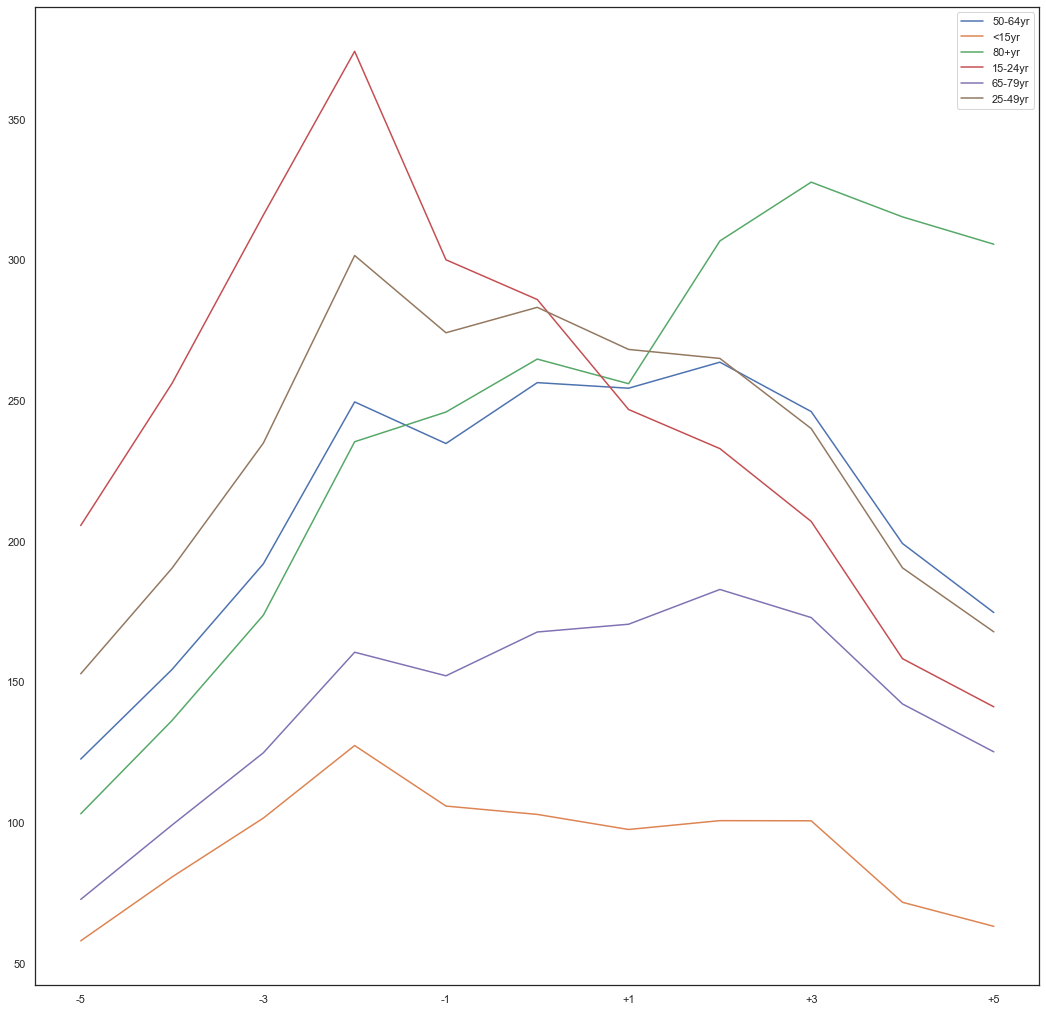

In [43]:
ban='EntertainmentVenues'
group_list2 = {}
plt.figure(figsize=(18,18))
for aa in set(age_range_notification_df['age_group']):
    group_list2[aa] = age_measures.groupby('Response_measure').\
        apply(lambda x: x.mean(skipna=True))[aa].loc[ban]\
            .loc[['-5','-4','-3','-2','-1','+0','+1','+2','+3','+4','+5']]
    group_list2[aa].plot(label=aa)
plt.legend()

<AxesSubplot:>

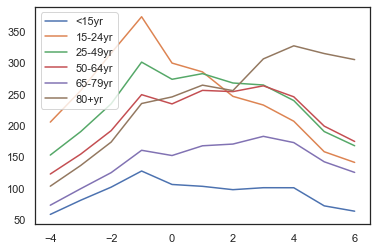

In [78]:
group_list_df2 = pd.DataFrame(group_list2)
group_list_df2 = group_list_df2[['<15yr', '15-24yr', '25-49yr', '50-64yr', '65-79yr', '80+yr']]
group_list_df2.index = group_list_df2.index.astype(int)+1
group_list_df2.plot()

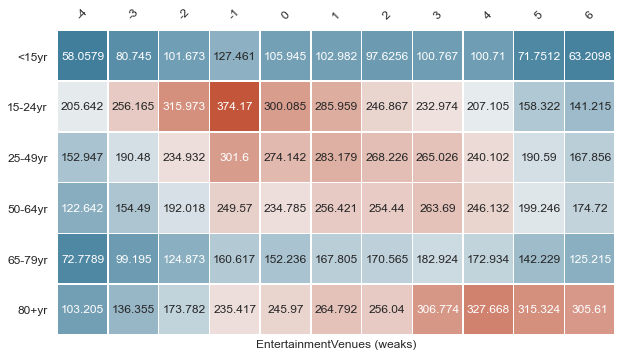

In [83]:
plt.figure(figsize=(10,6))
sns.set_theme(style='white')
cmap = sns.diverging_palette(230, 20, as_cmap=True)
hm = sns.heatmap(group_list_df2.T, square=True, cmap=cmap, center=None,
                annot=True, fmt='g', xticklabels=True, yticklabels=True, 
                cbar_kws={'shrink': 0.5}, cbar=False, linewidths=.5)
hm.set_xticklabels(hm.get_xticklabels(), rotation=45) 
hm.set_yticklabels(hm.get_yticklabels(), rotation=0)
hm.set(xlabel=None, ylabel=None)
hm.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xlabel('EntertainmentVenues' + ' (weaks)')
plt.show()

<Figure size 1296x1296 with 0 Axes>

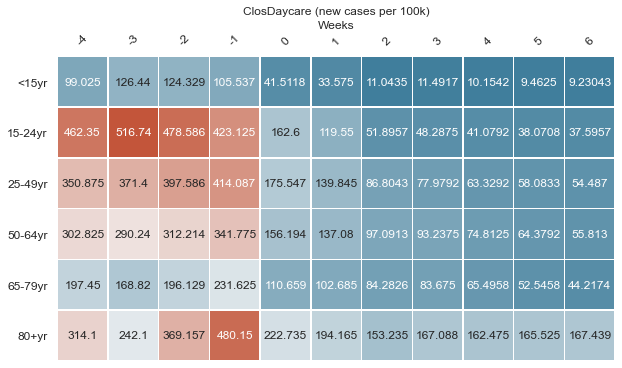

<Figure size 1296x1296 with 0 Axes>

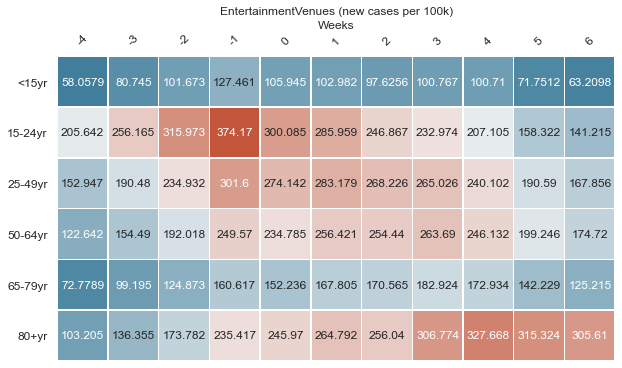

<Figure size 1296x1296 with 0 Axes>

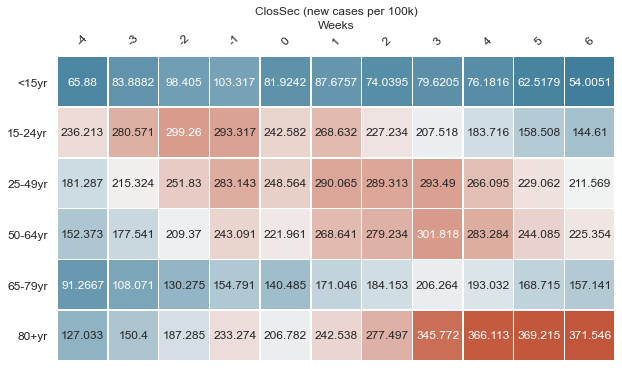

<Figure size 1296x1296 with 0 Axes>

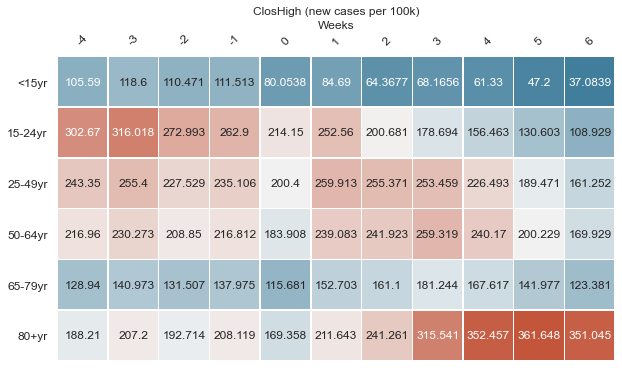

<Figure size 1296x1296 with 0 Axes>

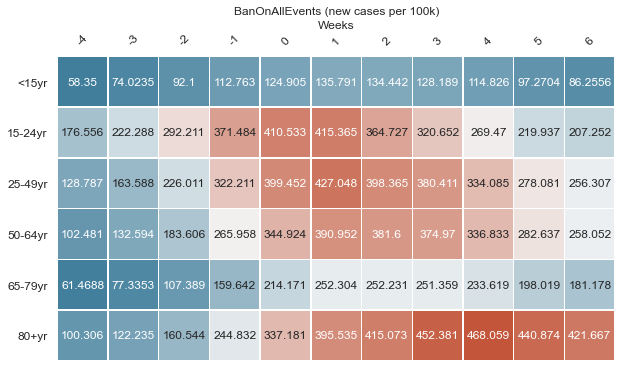

<Figure size 1296x1296 with 0 Axes>

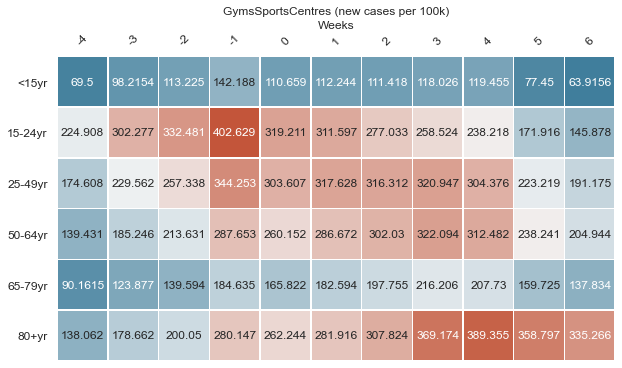

<Figure size 1296x1296 with 0 Axes>

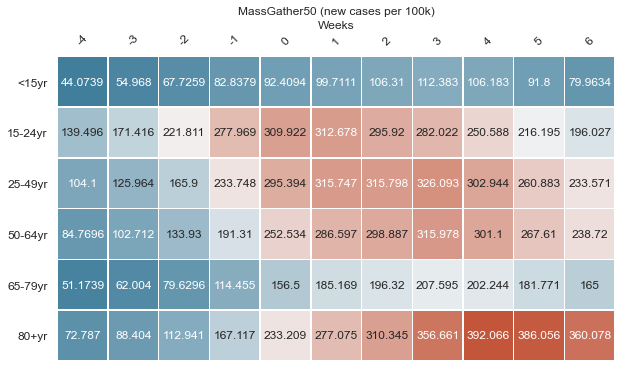

<Figure size 1296x1296 with 0 Axes>

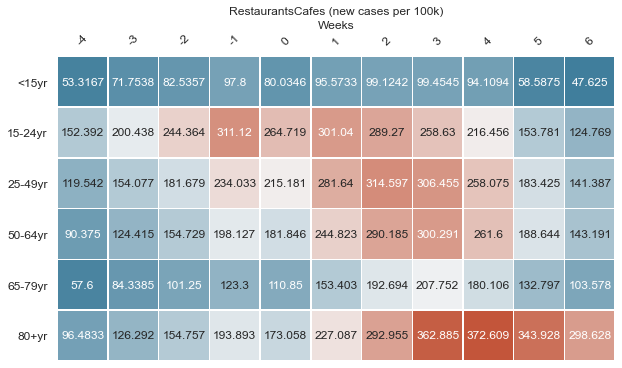

<Figure size 1296x1296 with 0 Axes>

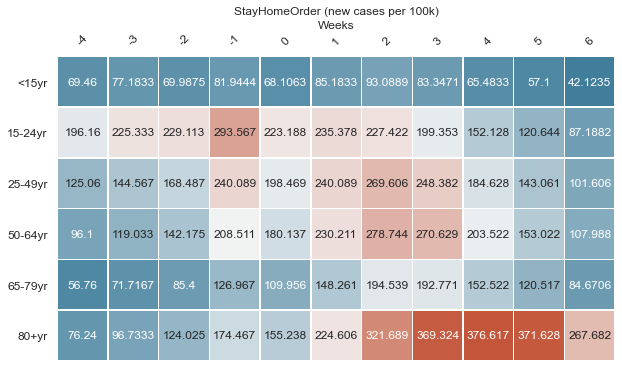

<Figure size 1296x1296 with 0 Axes>

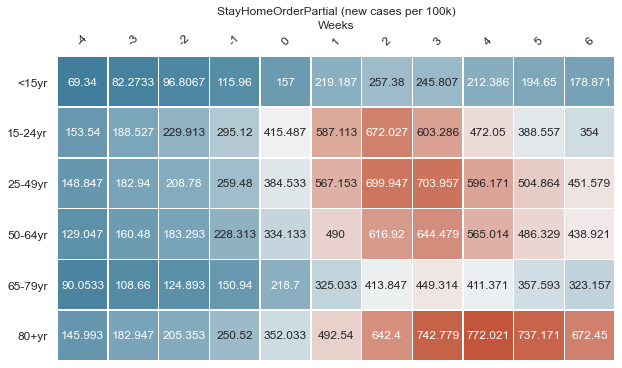

In [85]:
bans = ['ClosDaycare', 
        'EntertainmentVenues', 
        'ClosSec', 
        'ClosHigh', 
        'BanOnAllEvents', 
        'GymsSportsCentres',
        'MassGather50',
        'RestaurantsCafes',
        'StayHomeOrder',
        'StayHomeOrderPartial'
       ]
for ban in bans:
    group_list = {}
    plt.figure(figsize=(18,18))
    for aa in set(age_range_notification_df['age_group']):
        group_list[aa] = age_measures.groupby('Response_measure').\
            apply(lambda x: x.mean(skipna=True))[aa].loc[ban]\
                .loc[['-5','-4','-3','-2','-1','+0','+1','+2','+3','+4','+5']]
    #     group_list[aa].plot(label=aa)
    # plt.legend()

    group_list_df = pd.DataFrame(group_list)
    group_list_df = group_list_df[['<15yr', '15-24yr', '25-49yr', '50-64yr', '65-79yr', '80+yr']]
    group_list_df.index = group_list_df.index.astype(int)+1

    plt.figure(figsize=(10,6))
    sns.set_theme(style='white')
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    hm = sns.heatmap(group_list_df.T, square=True, cmap=cmap, center=None,
                    annot=True, fmt='g', xticklabels=True, yticklabels=True,
                    cbar_kws={'shrink': 0.5}, cbar=False, linewidths=.5)
    hm.set_xticklabels(hm.get_xticklabels(), rotation=45) 
    hm.set_yticklabels(hm.get_yticklabels(), rotation=0)
    hm.set(xlabel=None, ylabel=None)
    hm.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
    hm.set(xlabel='Weeks', ylabel=None)
    hm.xaxis.set_label_position('top')
    plt.title(ban + ' (new cases per 100k)')
    plt.show()